# Imports

## Main packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap


## Classification scores

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error


## Clustering packages and pips

In [ ]:
!pip install kmedoids
# k-medoids installations are done inside "K-medoids block"

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import BaggingClassifier

# Reading data

In [ ]:
categorical_data = pd.read_csv("categorical_mental_health_data.csv", sep = ",", index_col = 0)
data_numeric = pd.read_csv("only_numeric_mental_health_data.csv", sep = ",", index_col = 0)

# Creating Artificial Labels for Our Dataset (using t-SNE and K-means)

In [ ]:
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=1000)
TSNEdata = tsne.fit_transform(data_numeric)

In [ ]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(TSNEdata)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


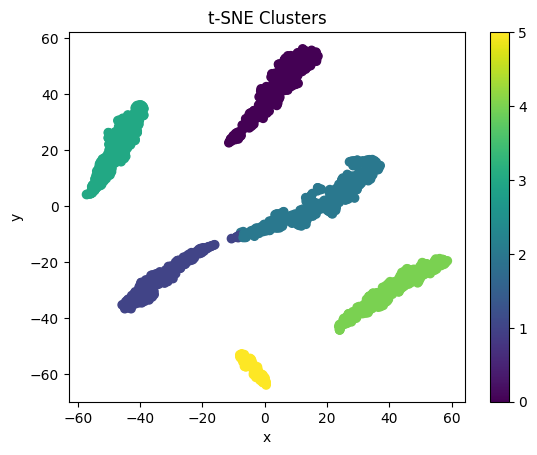

In [ ]:
plt.scatter(TSNEdata[:, 0], TSNEdata[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [ ]:
# Added column for predicitions (y_true)

data_numeric["labels"] = cluster_labels
categorical_data["labels"] = cluster_labels

# Applying Models

### Creating x_train, x_test, y_train and y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_numeric.drop("labels", axis =1), data_numeric.labels, test_size = 0.25, random_state = 22)

## DBSCAN

In [ ]:
clustering = DBSCAN(eps=5, min_samples=10).fit(data_numeric)

In [ ]:
DBSCAN_clusters = clustering.labels_
set(clustering.labels_)

{-1, 0, 1, 2, 3, 4, 5}

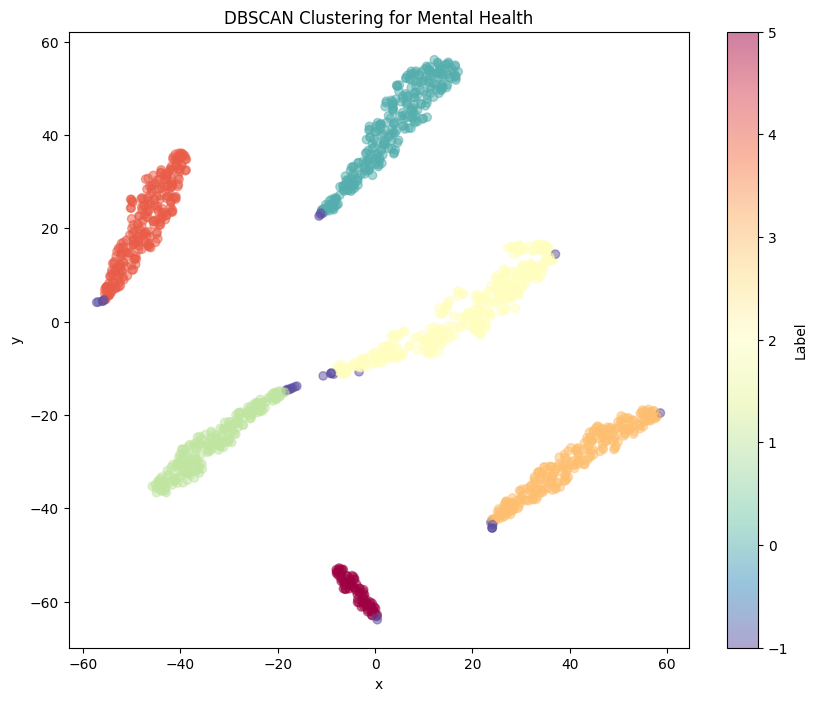

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(TSNEdata[:, 0], TSNEdata[:, 1], c=DBSCAN_clusters, cmap="Spectral_r", alpha=0.5)
plt.title('DBSCAN Clustering for Mental Health')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Label')
plt.show()

### Measuring performance

In [ ]:
silhouette_avg = silhouette_score(data_numeric.drop("labels", axis=1), DBSCAN_clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6917270533694558


## Decision Tree

In [ ]:
decision_tree = tree.DecisionTreeClassifier()
fitting = decision_tree.fit(X_train, y_train)

[Text(0.4444444444444444, 0.9, 'x[1] <= 9.0\ngini = 0.815\nsamples = 1074\nvalue = [206, 169, 255, 192, 193, 59]'),
 Text(0.2222222222222222, 0.7, 'x[23] <= 57.5\ngini = 0.015\nsamples = 257\nvalue = [0, 2, 255, 0, 0, 0]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 255\nvalue = [0, 0, 255, 0, 0, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= 875.0\ngini = 0.778\nsamples = 817\nvalue = [206, 167, 0, 192, 193, 59]'),
 Text(0.5555555555555556, 0.5, 'x[1] <= 181.5\ngini = 0.716\nsamples = 624\nvalue = [206, 167, 0, 192, 0, 59]'),
 Text(0.3333333333333333, 0.3, 'x[26] <= 0.25\ngini = 0.495\nsamples = 373\nvalue = [206, 167, 0, 0, 0, 0]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 167\nvalue = [0, 167, 0, 0, 0, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 206\nvalue = [206, 0, 0, 0, 0, 0]'),
 Text(0.7777777777777778, 0.3, 'x[26] <= 0.75\ngini = 0.36\nsamples = 251\nval

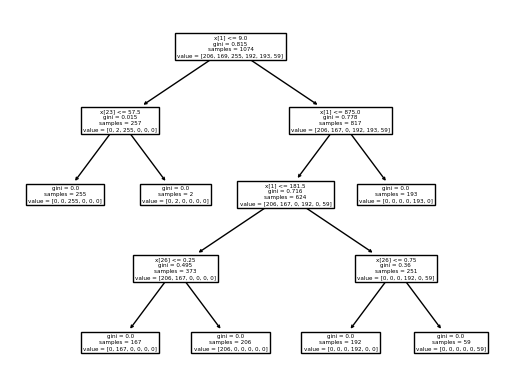

In [ ]:
# Visualizing the tree

tree.plot_tree(fitting)

In [ ]:
y_pred = fitting.predict(X_test)

### Measuring performance


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy}")

Accuracy of Decision Tree: 1.0


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# that one wrong predicted is the outlier identified later by PCA (index = 564)

Confusion Matrix:
 [[86  0  0  0  0  0]
 [ 0 46  0  0  0  0]
 [ 0  0 87  0  0  0]
 [ 0  0  0 56  0  0]
 [ 0  0  0  0 63  0]
 [ 0  0  0  0  0 21]]


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        63
           5       1.00      1.00      1.00        21

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



## K-medoids

In [ ]:
!pip install pyclustering

In [ ]:
from pyclustering.cluster import kmedoids
from pyclustering.cluster.kmedoids import kmedoids

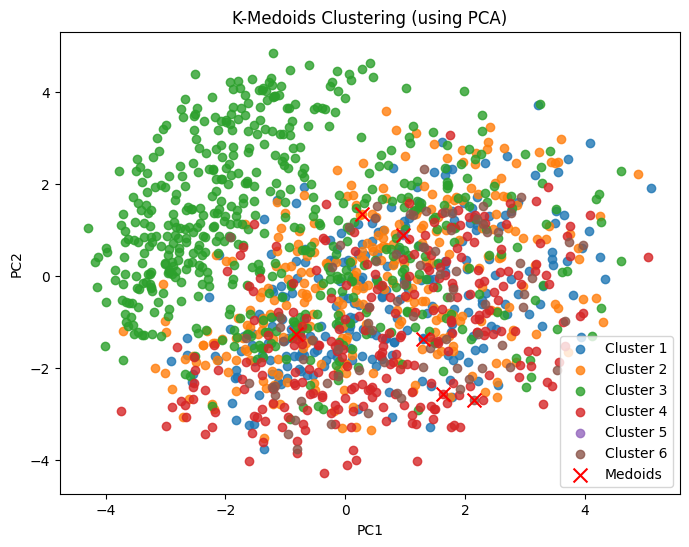

In [ ]:
k = 6
data_numeric_array = data_numeric.drop("labels", axis = 1).to_numpy()

# Visualizing by Using PCA (standardizing it first)
scaler = StandardScaler()
standard_x = scaler.fit_transform(data_numeric_array)

# Performing PCA for dimensionality reduction
pca = PCA(n_components=2)
data_numeric_pca = pca.fit_transform(standard_x)

# Creating KMedoids
initial_medoids = np.random.randint(0, len(data_numeric_array), k)
kmedoids_instance = kmedoids(data_numeric_array, initial_medoids)

# Clustering part
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster_index, cluster in enumerate(clusters):
    cluster_points = data_numeric_pca[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_index + 1}', alpha=0.8)
plt.scatter(data_numeric_pca[medoids, 0], data_numeric_pca[medoids, 1], c='red', marker='x', s=100, label='Medoids')
plt.title('K-Medoids Clustering (using PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
# To visualize it better using t-SNE, some modifications were needed to be done

kmedoids_clus = []

for i in data_numeric.index:
    for cluster_index, cluster in enumerate(clusters):
        if i in cluster:
            kmedoids_clus.append(cluster_index + 1) # as enumerate starts from 0 when clusters start from 1


print(kmedoids_clus)

[2, 3, 3, 3, 3, 4, 2, 4, 2, 3, 2, 1, 1, 1, 1, 1, 2, 6, 3, 1, 3, 4, 2, 3, 3, 1, 2, 1, 6, 3, 1, 1, 4, 3, 2, 1, 2, 1, 1, 4, 3, 1, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 4, 6, 4, 2, 1, 3, 1, 4, 2, 2, 3, 3, 3, 3, 4, 1, 2, 3, 1, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 1, 4, 3, 3, 3, 1, 2, 2, 3, 1, 6, 1, 3, 2, 2, 3, 2, 4, 3, 3, 1, 2, 4, 3, 3, 2, 2, 2, 1, 3, 6, 2, 3, 2, 3, 3, 3, 3, 1, 2, 4, 3, 6, 4, 4, 4, 2, 2, 1, 1, 3, 2, 6, 2, 2, 3, 2, 3, 3, 4, 4, 3, 3, 1, 3, 2, 1, 2, 4, 6, 3, 4, 1, 4, 4, 4, 4, 4, 3, 4, 2, 1, 3, 4, 3, 2, 2, 2, 3, 1, 3, 1, 3, 6, 2, 3, 1, 1, 4, 6, 6, 3, 2, 3, 4, 2, 1, 3, 6, 4, 1, 2, 6, 6, 1, 3, 6, 2, 3, 1, 6, 1, 3, 1, 6, 3, 6, 2, 6, 4, 2, 2, 1, 3, 1, 6, 2, 2, 2, 1, 2, 4, 6, 6, 4, 2, 3, 1, 3, 1, 1, 3, 3, 6, 3, 3, 4, 3, 4, 6, 4, 6, 2, 2, 3, 3, 2, 2, 6, 2, 2, 2, 4, 4, 1, 2, 2, 2, 1, 2, 3, 2, 4, 2, 3, 6, 1, 4, 3, 2, 4, 1, 3, 3, 1, 1, 1, 6, 3, 6, 3, 2, 2, 3, 1, 1, 3, 4, 1, 4, 3, 6, 4, 3, 3, 1, 3, 6, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 3, 1, 3, 2, 3, 3, 2, 3, 3, 1, 2, 2, 3, 2, 2, 

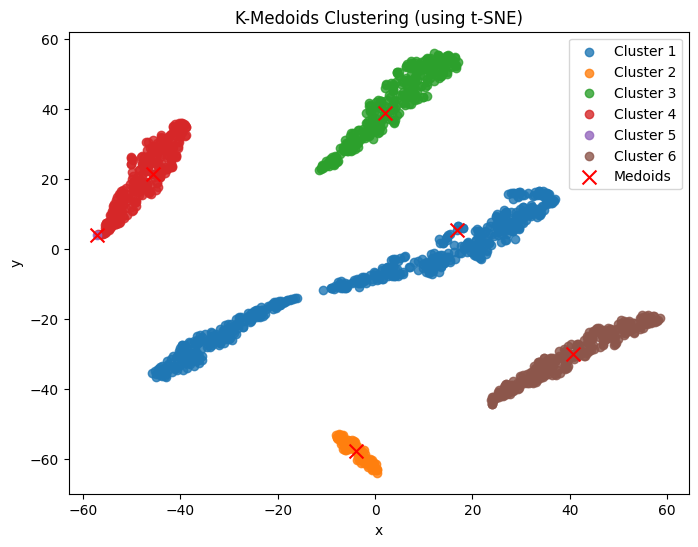

In [96]:
# Visualizing by t-SNE

k = 6 # our num of clusters (predetermined)
data_numeric_array = data_numeric.drop("labels", axis = 1).to_numpy()

# using t-sne as pca does not work good
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=1000)
data_numeric_tsne = tsne.fit_transform(data_numeric_array)

initial_medoids = np.random.randint(0, len(data_numeric_array), k)
kmedoids_instance = kmedoids(data_numeric_array, initial_medoids)

kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

plt.figure(figsize=(8, 6))
for cluster_index, cluster in enumerate(clusters):
    cluster_points = data_numeric_tsne[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_index + 1}", alpha=0.8)
plt.scatter(data_numeric_tsne[medoids, 0], data_numeric_tsne[medoids, 1], c='red', marker='x', s=100, label='Medoids')
plt.title('K-Medoids Clustering (using t-SNE)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Measuring performance

In [ ]:
silhouette_avg = silhouette_score(data_numeric.drop("labels", axis=1), kmedoids_clus)
print("Silhouette Score:", silhouette_avg)

# KNN (K-nearest Neighbors)

In [ ]:
# KNN by using PCA visualization
X = categorical_data.drop('labels', axis=1)
y = categorical_data['labels']

label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

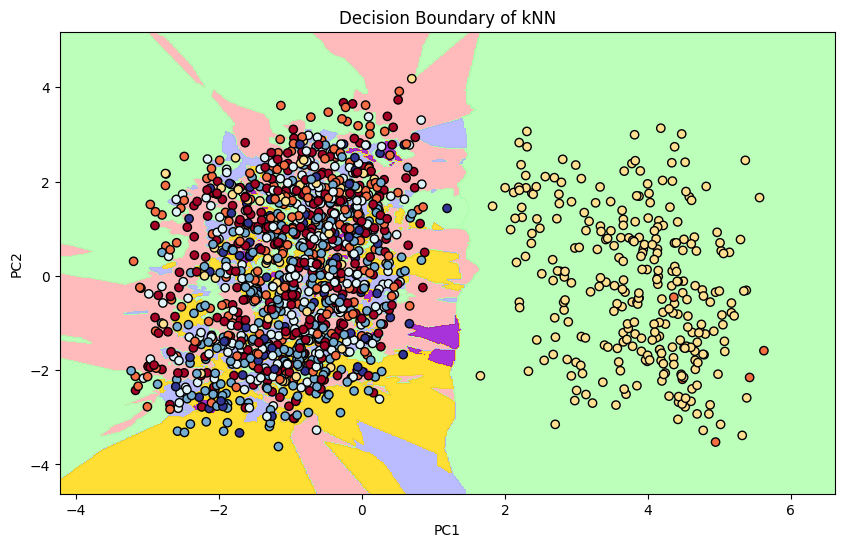

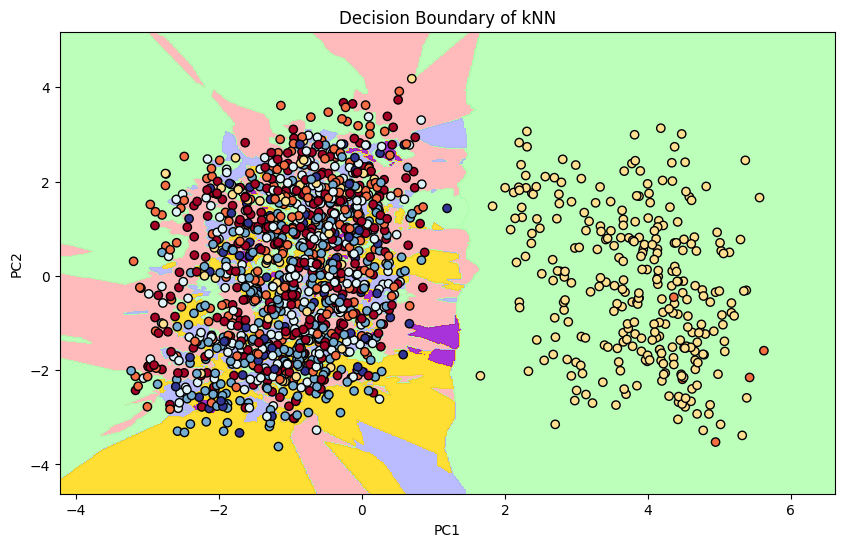

In [99]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#9400D3'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary of kNN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### Measuring Performance



In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
accuracy_score(y_test, y_pred)

***

[4 0 1 0 2 4 2 0 2 3 4 1 2 4 0 2 0 0 0 4 2 5 1 0 0 2 0 2 2 0 0 0 0 0 0 4 3
 0 4 4 3 0 4 4 1 3 3 4 4 1 0 3 2 3 3 3 0 1 0 0 4 4 4 2 0 2 4 1 3 0 0 3 5 4
 2 0 3 2 4 2 0 0 1 3 3 4 4 2 2 0 3 0 3 4 4 0 0 1 1 2 3 4 0 2 3 2 3 1 2 3 3
 0 0 1 4 1 4 3 2 2 2 2 0 0 3 3 0 1 0 1 3 2 1 0 0 4 0 3 4 0 1 4 1 2 2 1 0 0
 2 3 2 0 1 2 3 3 3 0 0 3 0 3 3 0 2 1 0 2 3 2 0 0 0 2 0 2 2 0 0 4 0 0 0 4 0
 0 4 0 1 0 3 1 4 0 0 2 0 0 3 1 1 4 2 1 0 0 3 0 4 2 4 4 1 3 2 0 1 1 2 0 0 1
 3 1 1 0 3 0 2 2 1 0 0 3 1 0 0 4 4 0 2 1 2 2 3 3 3 0 2 4 0 2 2 1 3 0 1 0 0
 4 4 1 0 1 2 2 0 4 0 3 0 3 0 4 0 3 2 0 2 3 2 1 4 0 2 2 0]
[4, 0, 1, 0, 2, 4, 2, 0, 2, 3, 4, 1, 2, 4, 0, 2, 0, 0, 0, 4, 2, 5, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 4, 3, 0, 4, 4, 3, 0, 4, 4, 1, 3, 3, 4, 4, 1, 0, 3, 2, 3, 3, 3, 0, 1, 0, 0, 4, 4, 4, 2, 0, 2, 4, 1, 3, 0, 0, 3, 5, 4, 2, 0, 3, 2, 4, 2, 0, 0, 1, 3, 3, 4, 4, 2, 2, 0, 3, 0, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 0, 2, 3, 2, 3, 1, 2, 3, 3, 0, 0, 1, 4, 1, 4, 3, 2, 2, 2, 2, 0, 0, 3, 3, 0, 1, 0, 1, 3, 2, 1, 0, 0, 4, 0, 3, 4,

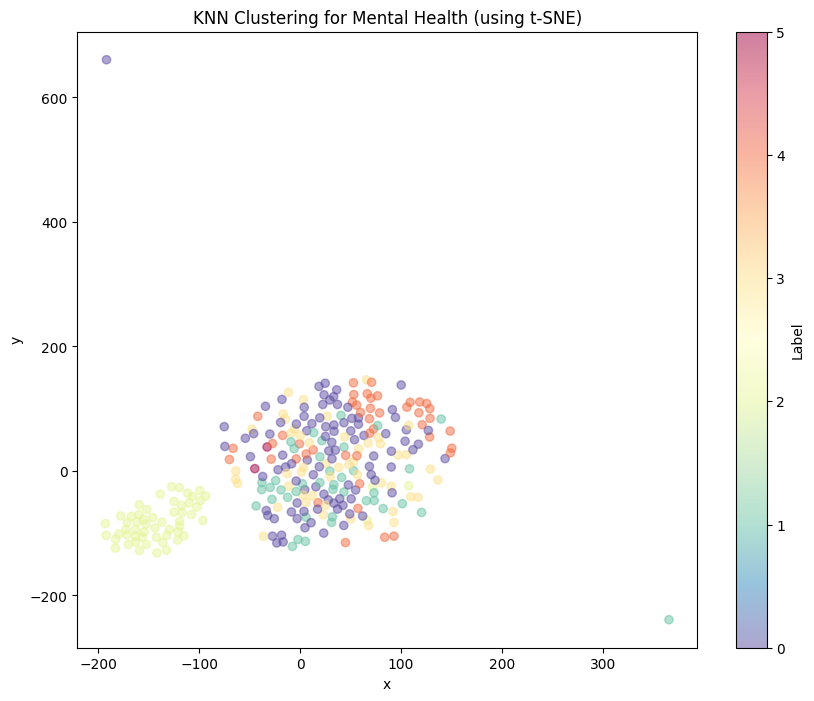

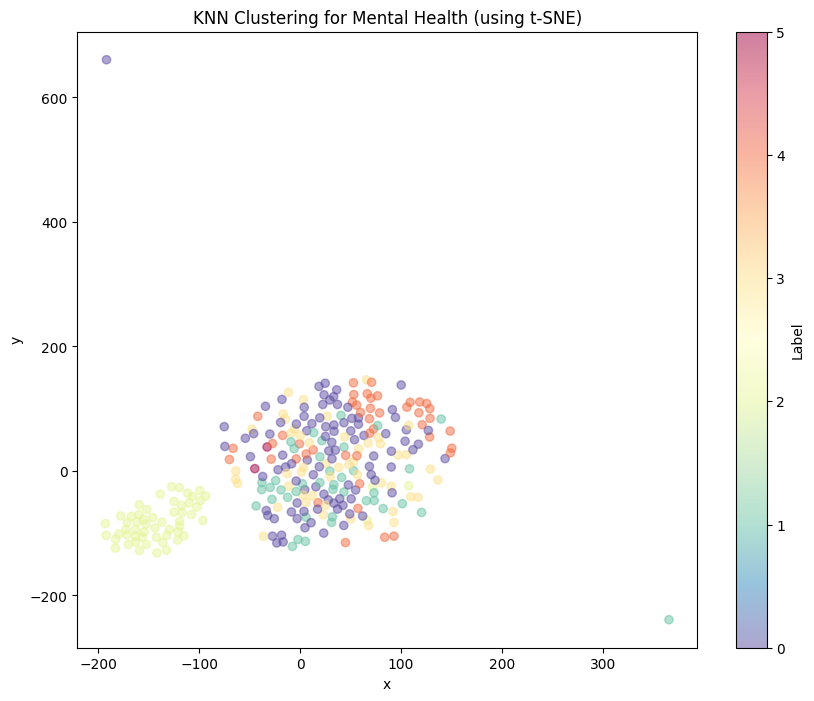

In [102]:
# Doing the same thing but visualized by t-SNE (better visualization for our particular data)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test)
print(y_pred)
new_y_pred = ','.join(str(label) for label in y_pred)
y_pred = np.array(new_y_pred.split(','))
y_pred = [int(x) for x in y_pred]
print(y_pred)

tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=1000.0)
TSNEtest = tsne.fit_transform(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(TSNEtest[:, 0], TSNEtest[:, 1], c=y_pred, cmap="Spectral_r", alpha=0.5)
plt.title('KNN Clustering for Mental Health (using t-SNE)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Label')
plt.show()

# GMM (Gaussian Mixture Models)

In [ ]:
X = data_numeric.select_dtypes(include=['number'])

n_components_range = range(2, 6)

best_silhouette_score = float("-inf")
best_n_components = 2

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_n_components = n_components

gmm = GaussianMixture(n_components=best_n_components, random_state=42)
labels = gmm.fit_predict(X)
data_numeric['cluster_label'] = labels

# data.to_csv('/content/numerical_mental_health_data.csv', index=False)


### Measuring Performance

In [ ]:
print(f"Best number of components: {best_n_components}")
print(f"Best Silhouette Score: {best_silhouette_score}")

# Regressions (Lasso and Ridge)

In [ ]:
label_map = {'Yes': 1, 'No': 0, 'Maybe': 0.5}
categorical_data['CurrentMentalHealthDisorder'] = categorical_data['CurrentMentalHealthDisorder'].map(label_map)

X = categorical_data.select_dtypes(include=['number'])
y = categorical_data['CurrentMentalHealthDisorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


### Measuring performance

In [ ]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Mean Squared Error:", mse_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Mean Squared Error:", mse_lasso)

# Bagging

In [114]:
labeled_data = pd.read_csv("data_mental_health_labeled.csv")

In [115]:
y = labeled_data.labels
X = labeled_data.drop("labels", axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range = [1, 2, 4, 6, 8, 10, 100]

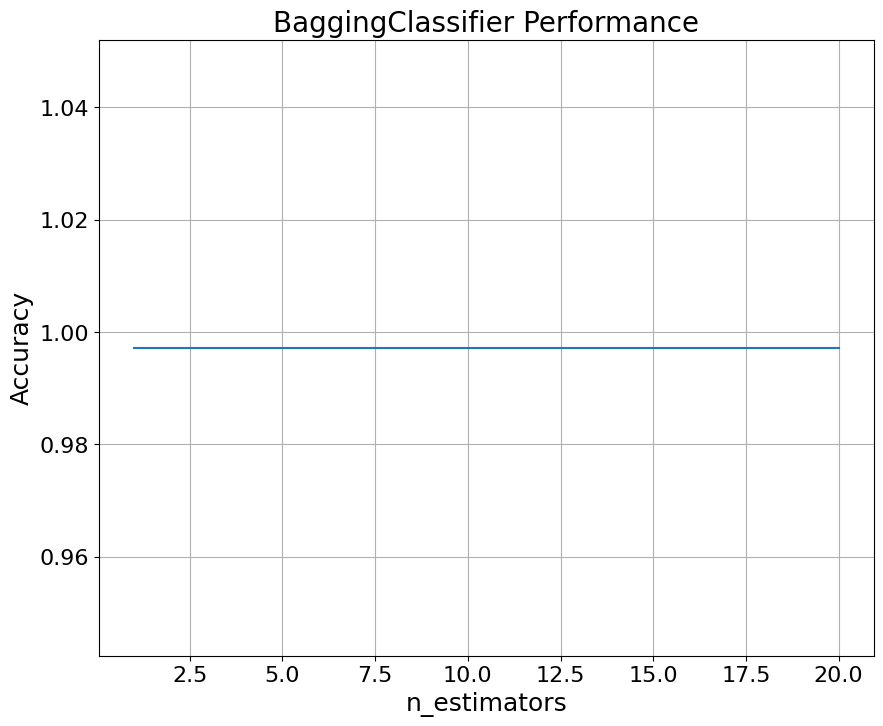

In [119]:
# default classifier for Bagging is Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

data_numeric = pd.read_csv('/content/data_mental_health_labeled.csv')

X_encoded = pd.get_dummies(data_numeric.drop("labels", axis=1))
X_train, X_test, y_train, y_test = train_test_split(X_encoded, data_numeric['labels'], test_size=0.25, random_state=22)

estimator_range = range(1, 21)

models = []
scores = []

for n_estimators in estimator_range:
    bagging = BaggingClassifier(n_estimators=n_estimators, random_state=22)
    bagging.fit(X_train, y_train)
    models.append(bagging)
    scores.append(accuracy_score(y_true=y_test, y_pred=bagging.predict(X_test)))

# Plot the performance for different number of estimators
plt.figure(figsize=(10,8))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.title("BaggingClassifier Performance", fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(True)
plt.show()


# K-means

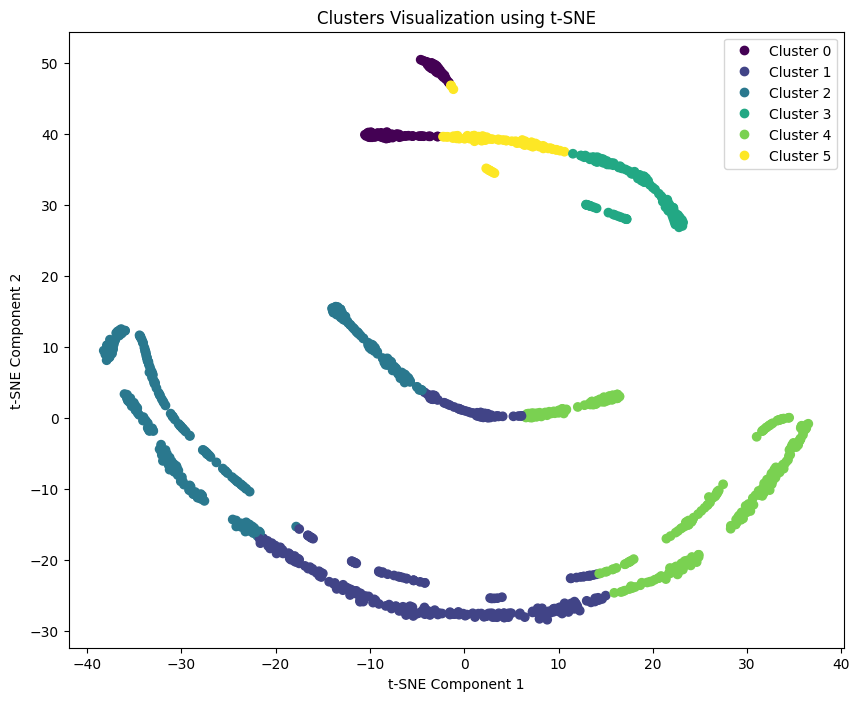

In [122]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

data_numeric = pd.read_csv('/content/data_mental_health_labeled.csv')

X_train, X_test, y_train, y_test = train_test_split(data_numeric.drop("CurrentMentalHealthDisorder", axis=1), data_numeric.labels, test_size=0.25, random_state=22)

X_encoded = pd.get_dummies(X_train)

kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(X_encoded)

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_encoded)

cluster_labels = kmeans.predict(X_encoded)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(6)])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters Visualization using t-SNE')
plt.show()

# Finding Possible Outliers (in dataset)

## PCA (handling with outliers)


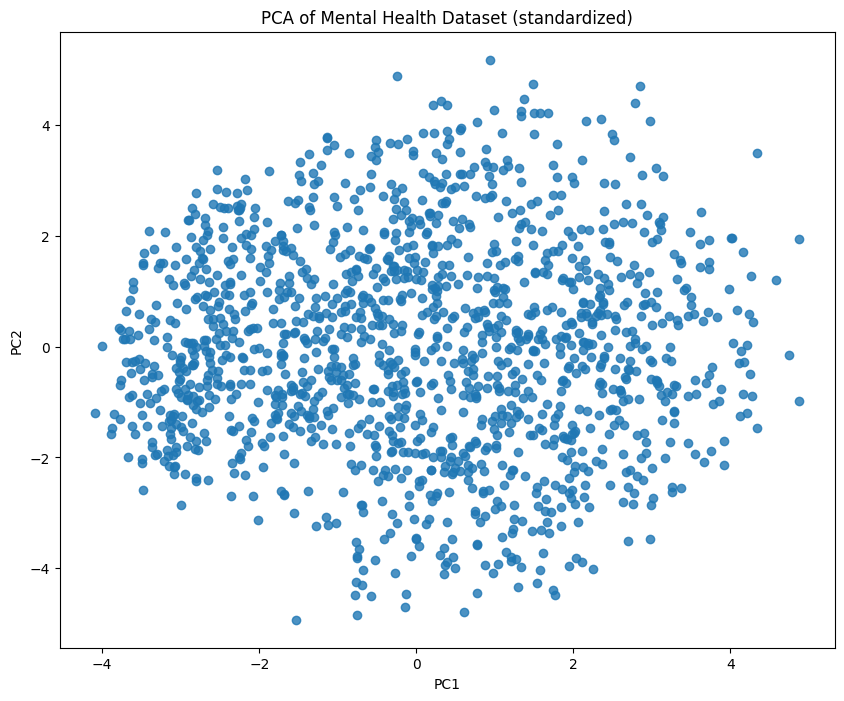

In [ ]:
# in standardized version of dimensionality reduction we do not observe clear pattern of outliers (2 clusters are distinguishable)

scaler = StandardScaler()
standard_x = scaler.fit_transform(data_numeric)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(standard_x)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.title('PCA of Mental Health Dataset (standardized)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

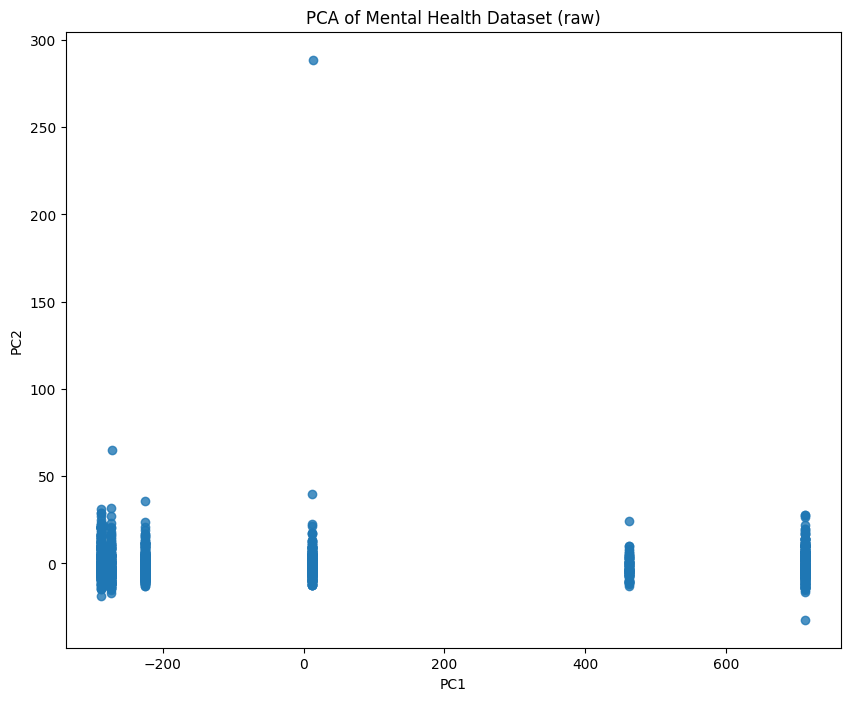

In [ ]:
# In non-standardized form we observe one small obvious outlier

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_numeric.drop("labels", axis = 1))

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.title('PCA of Mental Health Dataset (raw)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

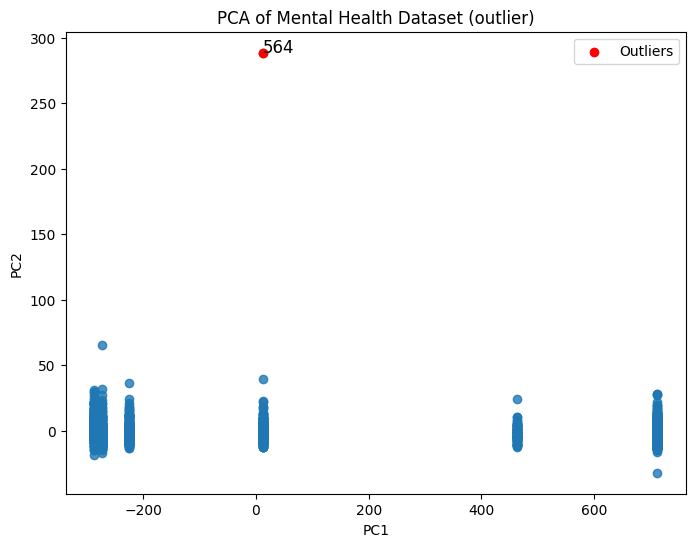

Index of the outlier: [564]


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_numeric.drop("labels", axis = 1))

mean_score = np.mean(X_pca, axis=0)
std_score = np.std(X_pca, axis=0)
z_scores = np.abs((X_pca - mean_score) / std_score)

threshold = 6 # Experimenting with the threshold found that exact outlier
outliers_indices = np.where(z_scores > threshold)

# Finding the exact index
outliers_index_in_original_data = outliers_indices[0]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.scatter(X_pca[outliers_index_in_original_data, 0], X_pca[outliers_index_in_original_data, 1], color='red', label='Outliers')
for i in outliers_index_in_original_data:
    plt.text(X_pca[i, 0], X_pca[i, 1], str(i), fontsize=12, color='black')
plt.title('PCA of Mental Health Dataset (outlier)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

print("Index of the outlier:", outliers_index_in_original_data)

In [ ]:
# Just checking that particular value from the dataset
data_numeric.loc[564, :]

SelfEmployed                                                      0.00
NumEmployees                                                    300.00
TechCompany                                                       1.00
MentalHealthBenefits                                              1.00
EmployerDiscussedMentalHealth                                     0.50
ResourcesForMentalHealth                                          0.50
AnonymityProtected                                                0.50
MentalHealthMedicalLeave                                          0.50
DiscussMentalHealthWithSupervisor                                 0.50
EmployerTakeMentalHealthSeriously                                 0.50
IfRevealedNegativeImpact                                          0.25
MentalHealthNegativeProductivity                                  0.25
PreviousWork                                                      1.00
BringUpPhysicalHealthIssueInInterview                             1.00
BringU